<a href="https://colab.research.google.com/github/bpazos97/ArcticMonkeysNLP/blob/main/Arctic_Monkeys_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setup**

In [1]:
#!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Introduction**
I'll attempt to do following:




1.   Scrap the lyrics of all Arctic Monkeys songs
2.   Derive metrics from raw text, visualize distributions




Tell stories though visuals
Sentiment analysis
Random song lyrics generator with Markov Chains
Extract themes automatically aka topic modelling
Dependencies: Pandas, Numpy, Seaborn, NLTK, scikit-learn

## **Scrapping the lyrics**
First step is to get all the lyrics of the Artcic Monkeys. I will use BeautifulSoup to do so.

In [2]:
from bs4 import BeautifulSoup
import requests
import os

letras_url = "https://www.letras.com"

def descargar_letras(artista):
    folder_name = f"{artista.capitalize()} Lyrics"
    folder_path = os.path.join('/content', folder_name)

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    link = letras_url + f"/{artista}/"
    html_obtenido = requests.get(link)
    soup = BeautifulSoup(html_obtenido.text, "html.parser")
    a_todos = soup.find_all('a', href=True, class_="song-name")
    links = []
    for a in a_todos:
        links.append(f"{letras_url}{a['href']}")

    for cancion in links:
        html_obtenido = requests.get(cancion)
        soup = BeautifulSoup(html_obtenido.text, "html.parser")
        titulo = soup.find('h1').text
        letra = ""
        for div in soup.findAll("div", {"class": "cnt-letra-trad g-pr g-sp"}):
            for p in div.findAll("p"):
                text = str(p)
                for space in ["</br>", "<br>", "<br/>", "<p>", "</p>"]:
                    text = text.replace(space, "\n")
                letra += text
        file_path = os.path.join(folder_path, f"{titulo}.txt")
        with open(file_path, 'w') as f:
            f.write(letra)

artista = "arctic-monkeys"
descargar_letras(artista)



In [3]:
import os
import pandas as pd


directory_path = '/content/Arctic-monkeys Lyrics'


df = pd.DataFrame(columns=['song', 'lyrics'])


for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)


    if os.path.isfile(file_path) and file_name.endswith('.txt'):
        with open(file_path, 'r') as file:
            content = file.read()


        file_name = os.path.splitext(file_name)[0]


        df = df.append({'song':file_name, 'lyrics': content}, ignore_index=True)


<ipython-input-3-1598cc73fd6b>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'song':file_name, 'lyrics': content}, ignore_index=True)
<ipython-input-3-1598cc73fd6b>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'song':file_name, 'lyrics': content}, ignore_index=True)
<ipython-input-3-1598cc73fd6b>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'song':file_name, 'lyrics': content}, ignore_index=True)
<ipython-input-3-1598cc73fd6b>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'song':file_name, 'lyrics': content}, ignore_index=True)
<ipython-input-3-1598cc73fd6

In [4]:
df.loc[0, 'lyrics']

"\nI want an interesting synonym to describe this thing\nThat you say we're all grandfathered in\nI'll use the search engine\n(We've got much to discuss)\nToo much to discuss over a bucket of balls\nI can recall the glow of your low beams\n\nIt's the big night in Tinsel City\nLife became a spectator sport\nI launch my fragrance called Integrity\nI sell the fact that I can't be bought\nHave I told you all about the time that I got sucked into a hole\nThrough a handheld device?\nI will flashback now and again, but I'm usually alright\nThankfully, the process has been simplified\nSince the last time you tried\n\nI've recognized the glow of your low beams numerous times\nI'll be by the Batphone if you need to get a hold\nMaking a selection, opening credits roll\nPanoramic windows looking out across your soul\n\nYou go in through the door\nVengeance trilogy wallpaper walls\nThey have re-decorated it all\nThey've changed all the lights and the bar's down the side\n\nI've recognized the glow 

## **Feature Engineering**

Number of characters, words, lines, unique words and lexical density for each song.

In [5]:
df['#characters'] = df.lyrics.str.len()
df['#words'] = df.lyrics.str.split().str.len()
df['#lines'] = df.lyrics.str.split('\n').str.len()
df['#uniq_words'] = df.lyrics.apply(lambda x: len(set(x.split())))
df['lexical_density'] = df['#uniq_words'] / df['#words']
df.head(5)

,song,lyrics,#characters,#words,#lines,#uniq_words,lexical_density
0,Batphone,\nI want an interesting synonym to describe th...,1384,252,38,152,0.603175
1,Fire And The Thud,\nYou showed me my tomorrow\nBeside a box of m...,1051,197,40,140,0.710660
2,Catapult,"\nBoth sides, and softly came the growl from b...",1460,289,43,168,0.581315
3,I Haven't Got My Strange,\nWhen I got back from fixing my hair\nYou wer...,666,129,27,79,0.612403
4,Jet Skis On The Moat,\nJet skis on the moat\nThey shot it all in Ci...,846,161,36,91,0.565217


## **Distributions**


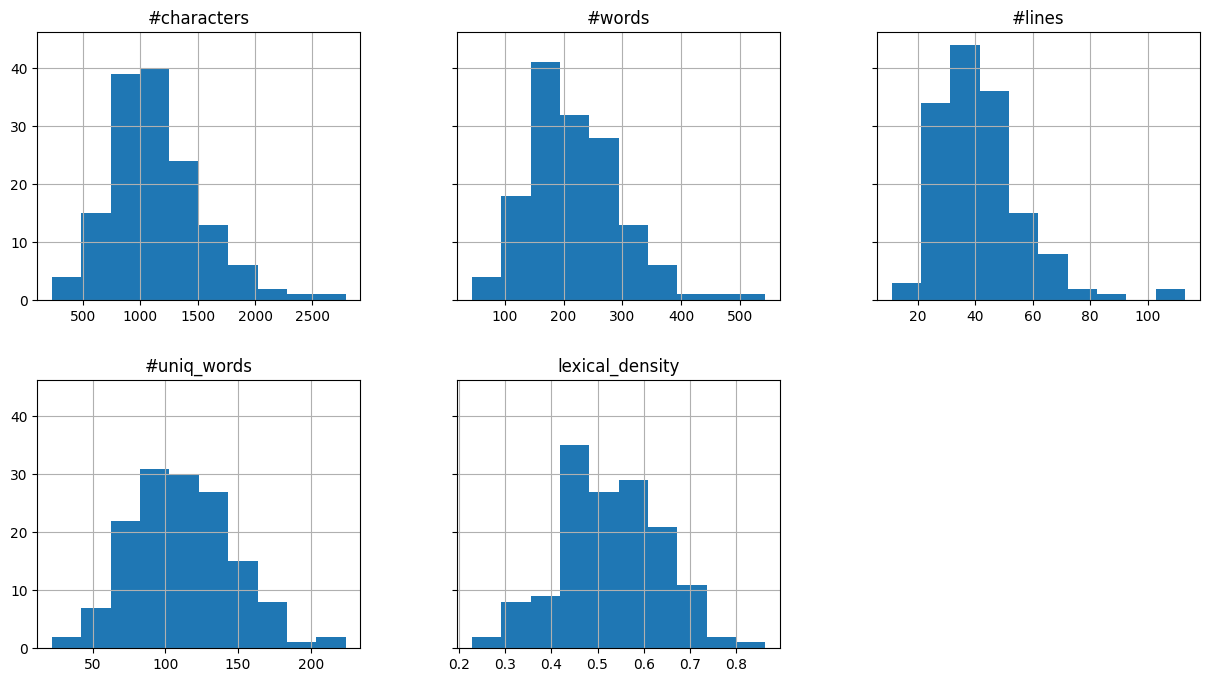

In [6]:
df.hist(sharey=True, layout=(2, 3), figsize=(15, 8));

### **Word Length Distribution**

Word lengths between 1-5 cover 85% of the total words used.

<Axes: >

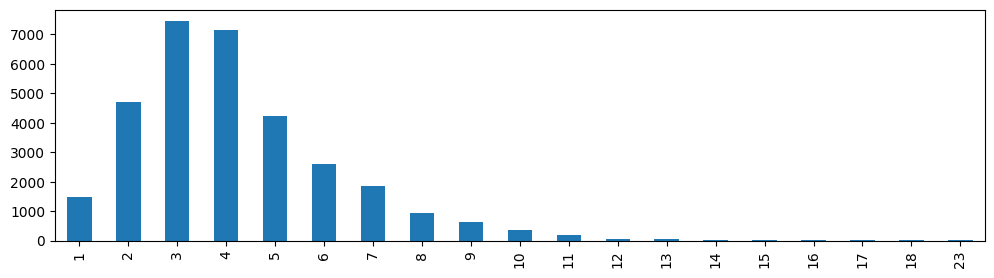

In [7]:
pd.Series(len(x) for x in ' '.join(df.lyrics).split()).value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

### **Most common words**

We're not removing any stopwords.

<Axes: >

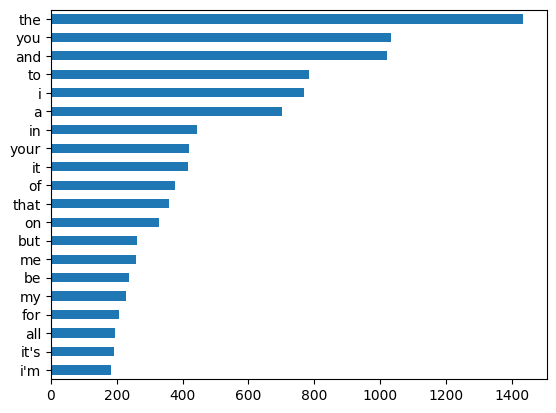

In [8]:
pd.Series(' '.join(df.lyrics).lower().split()).value_counts()[:20][::-1].plot(kind='barh')

### **Most common longer words**

There is something there.

<Axes: >

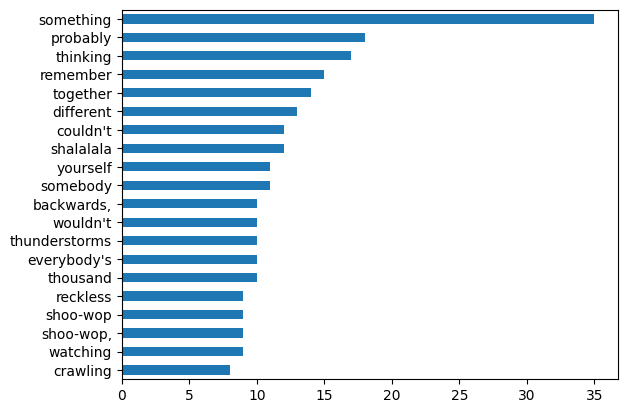

In [9]:
pd.Series([w for w in ' '.join(df.lyrics).lower().split() if len(w) > 7]).value_counts()[:20][::-1].plot(kind='barh')

## **Most common n-grams**

In [10]:
from nltk import ngrams

In [11]:
def get_ngrams_from_series(series, n=2):
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]

### **Bi-grams**

<Axes: >

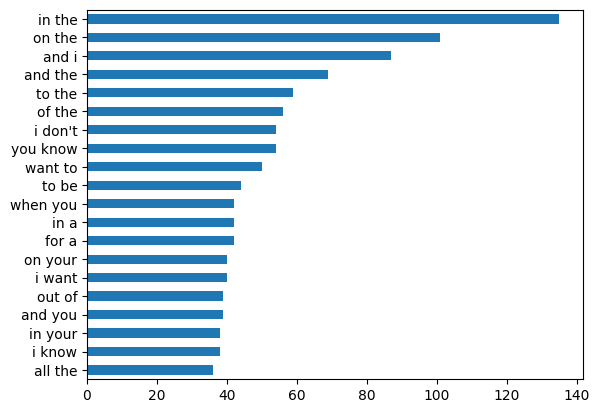

In [12]:
pd.Series(get_ngrams_from_series(df.lyrics, 2)).value_counts()[:20][::-1].plot(kind='barh')

### **Tri-grams**

<Axes: >

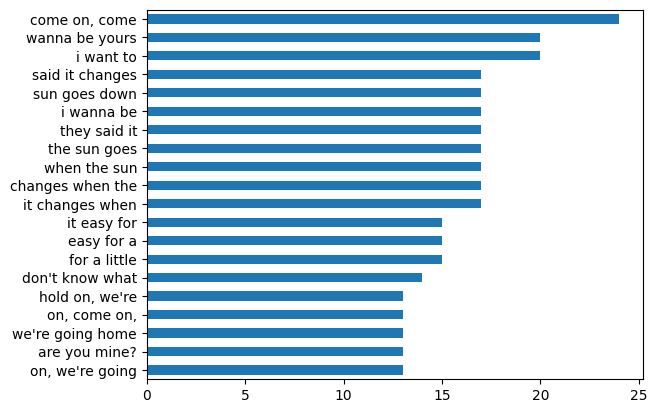

In [13]:
pd.Series(get_ngrams_from_series(df.lyrics, 3)).value_counts()[:20][::-1].plot(kind='barh')

### **Quad-grams**
When the sun goes down is a pretty repetitive song, yes.

<Axes: >

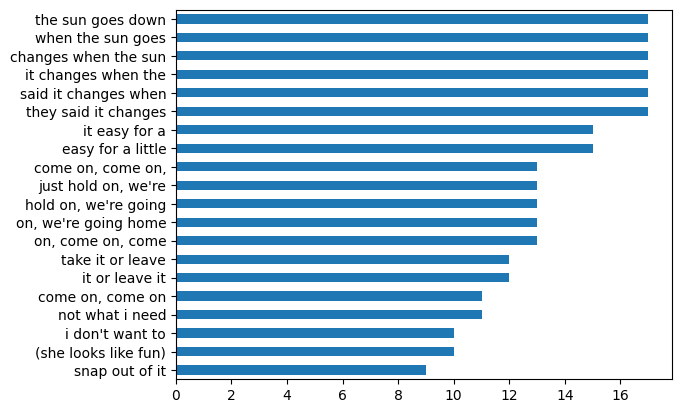

In [14]:
pd.Series(get_ngrams_from_series(df.lyrics, 4)).value_counts()[:20][::-1].plot(kind='barh')

## **Sentiment**

In [15]:
import nltk
from nltk import sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

In [17]:
senti_analyze.polarity_scores(df.lyrics[0])

{'neg': 0.058, 'neu': 0.861, 'pos': 0.081, 'compound': 0.6059}

In [18]:
import numpy as np
df['sentiment_score'] = pd.DataFrame(df.lyrics.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_score'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

### **Sentiment Score distribution**

Songs seem to be mostly positive

array([[<Axes: title={'center': 'sentiment_score'}>]], dtype=object)

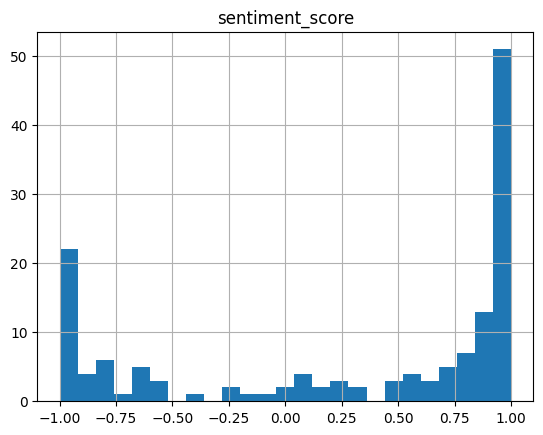

In [19]:
df[['sentiment_score']].hist(bins=25)

### **Correlation**

<ipython-input-20-6e20fc7e726b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

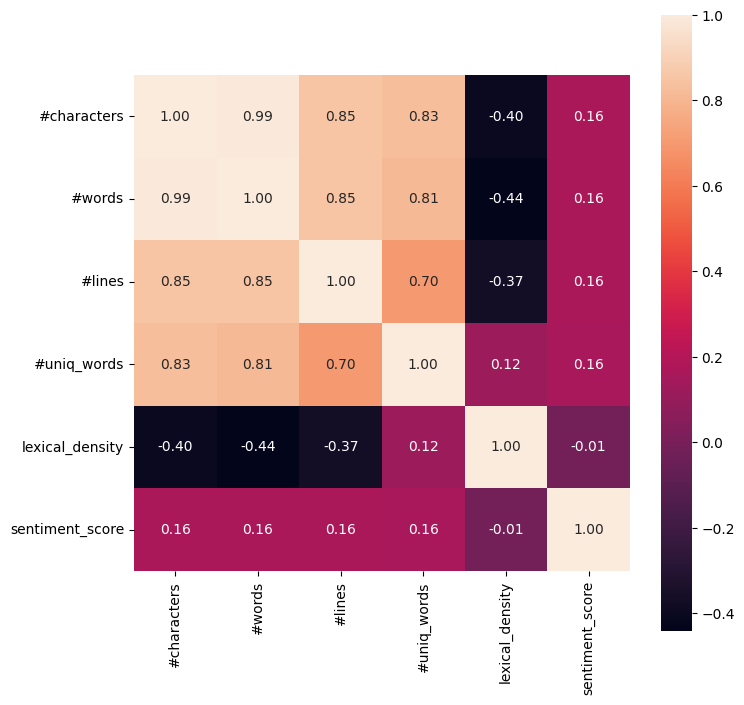

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### **Pairwise relationships**

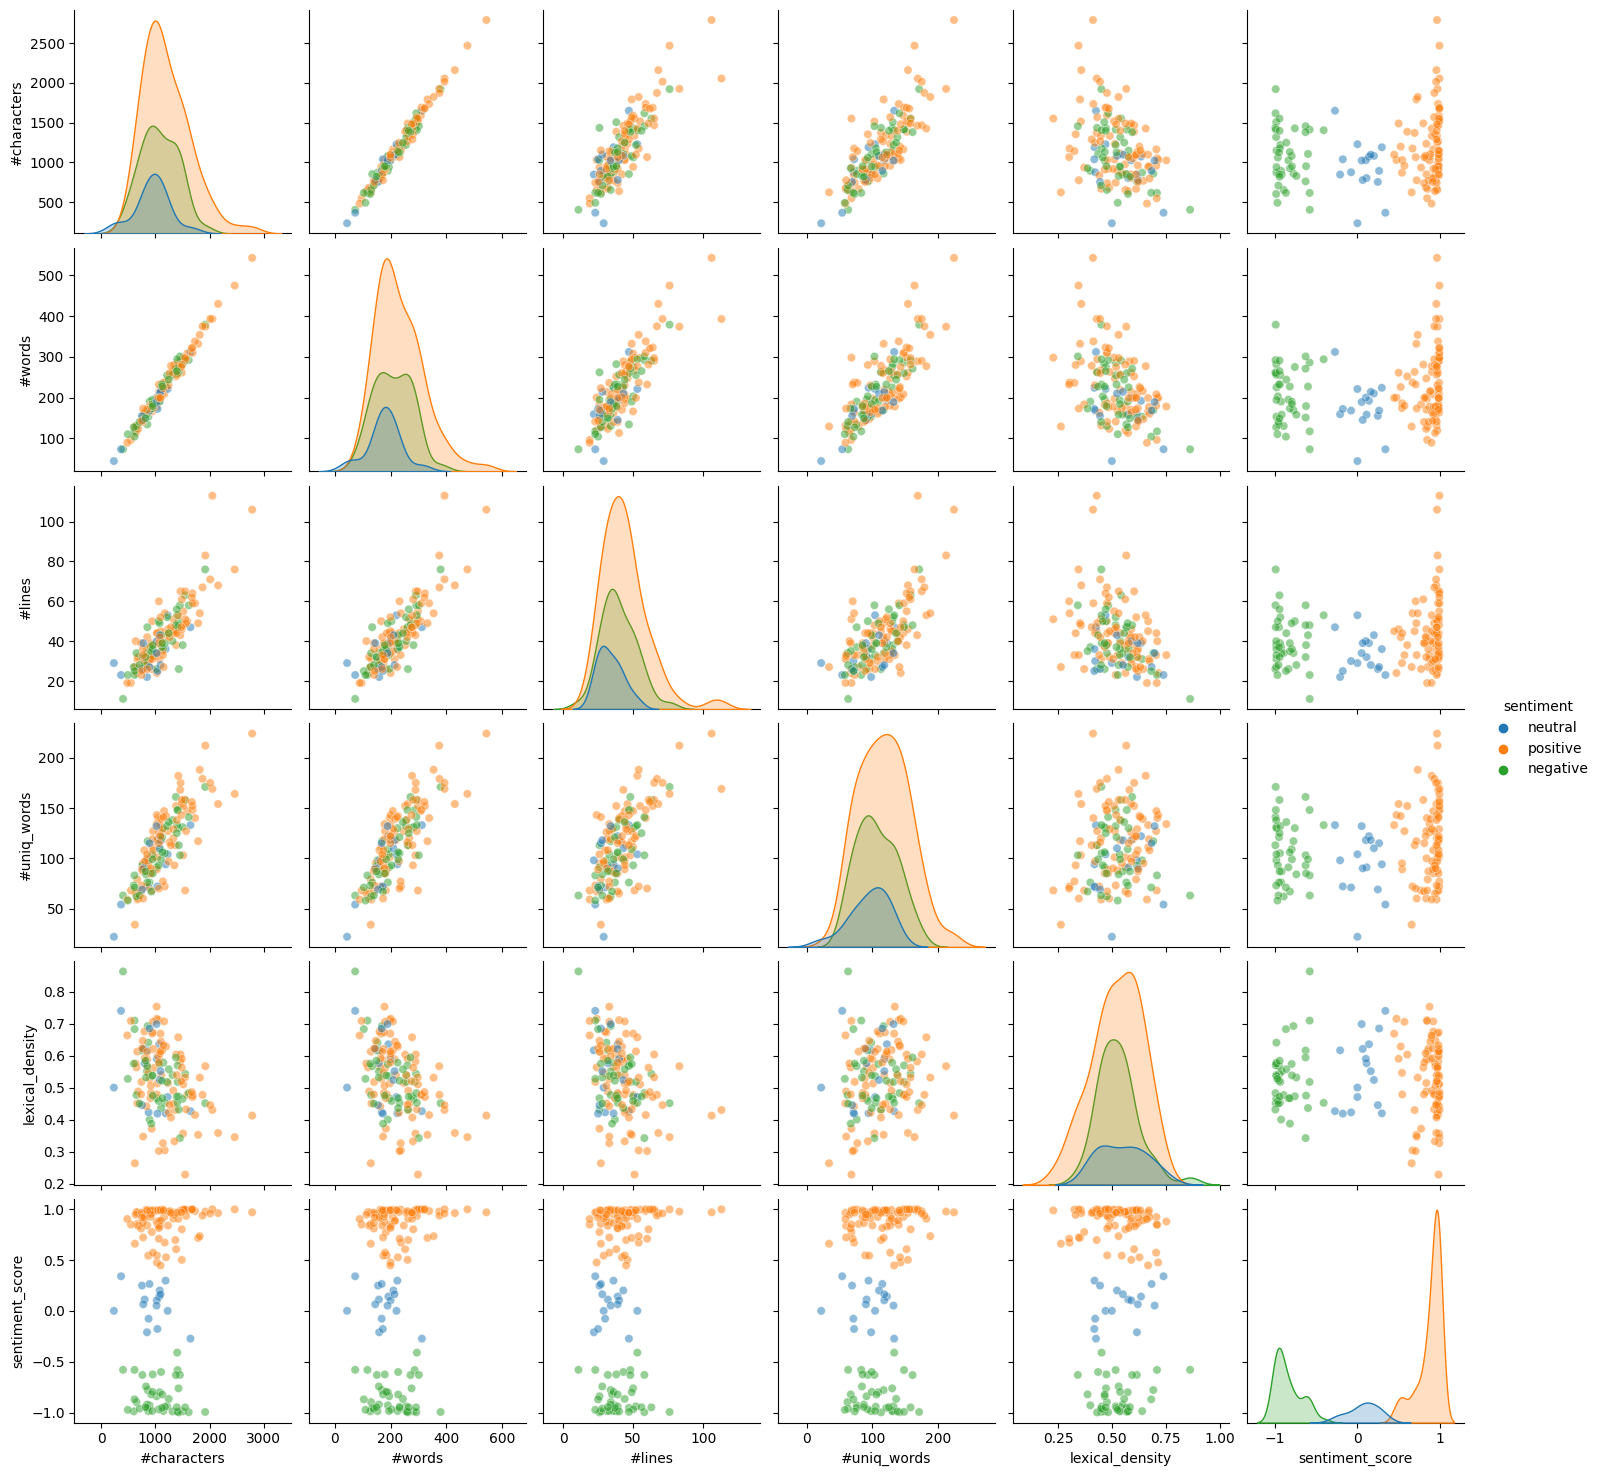

In [21]:
sns.pairplot(df, hue='sentiment', hue_order=['neutral', 'positive', 'negative'],
             plot_kws={'alpha': 0.5})

### **Lexical density sentiments**
Negative songs have

<Axes: xlabel='sentiment_score', ylabel='lexical_density'>

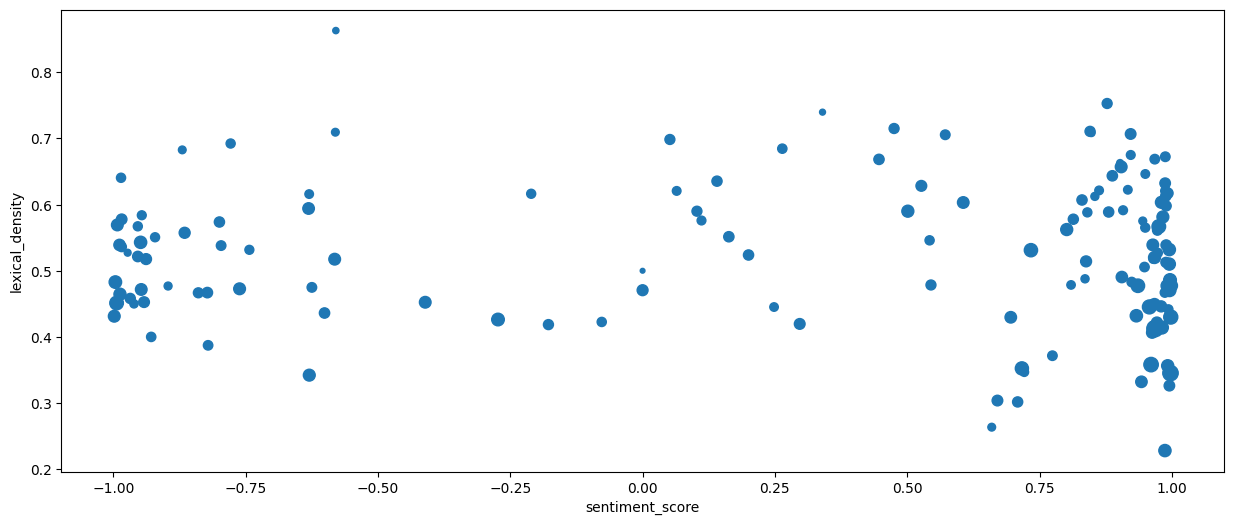

In [22]:
df.plot.scatter(x='sentiment_score', y='lexical_density', s=df['#characters']/20,
                figsize=(15, 6))

### **Non-parametric estimates**



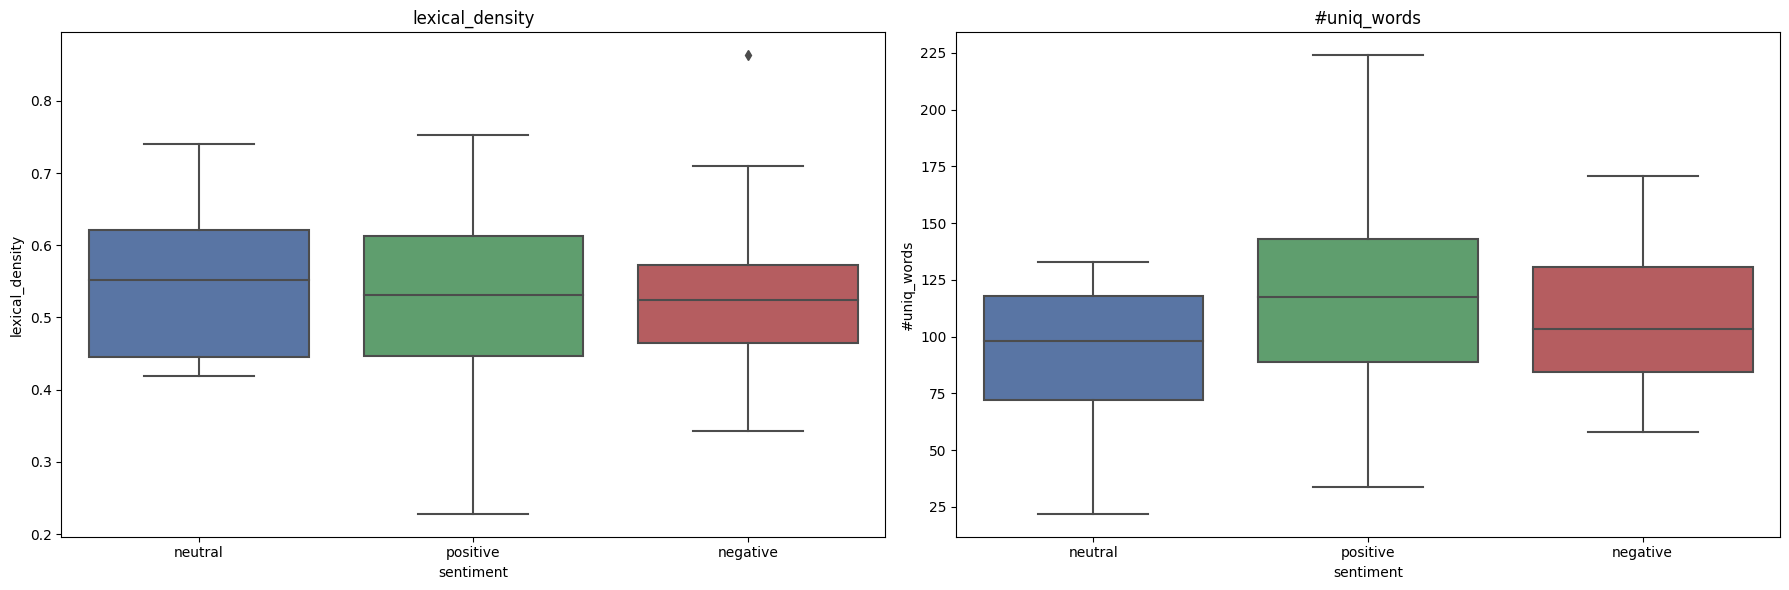

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
cols_metrics = ['lexical_density', '#uniq_words']
colors = ['#4c72b0', '#55a868', '#c44e52']  # Blue, Green, Red
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(cols_metrics))
for i, c in enumerate(cols_metrics):
    sns.boxplot(x='sentiment', y=c, data=df, ax=axs[i], order=['neutral', 'positive', 'negative'], palette=colors)
for i, ax in enumerate(axs):
    ax.set_title(cols_metrics[i])
plt.tight_layout()
plt.show()

## **Song Generator**

We use a simplistic Markov chain model to generate song from a Arctic Monkeys corpus.


*   The last two words are the current state.
*   Next word depends on last two words only, or on present state only.
*   The next word is randomly chosen from a statistical model of the corpus.

In [24]:
import re
import random
from collections import defaultdict


class MarkovRachaita:
    def __init__(self, corpus='', order=2, length=8):
        self.order = order
        self.length = length
        self.words = re.findall("[a-z']+", corpus.lower())
        self.states = defaultdict(list)

        for i in range(len(self.words) - self.order):
            self.states[tuple(self.words[i:i + self.order])].append(self.words[i + order])

    def gen_sentence(self, length=8, startswith=None):
        terms = None
        if startswith:
            start_seed = [x for x in self.states.keys() if startswith in x]
            if start_seed:
                terms = list(start_seed[0])
        if terms is None:
            start_seed = random.randint(0, len(self.words) - self.order)
            terms = self.words[start_seed:start_seed + self.order]

        for _ in range(length):
            terms.append(random.choice(self.states[tuple(terms[-self.order:])]))

        return ' '.join(terms)

    def gen_song(self, lines=10, length=8, length_range=None, startswith=None):
        song = []
        if startswith:
            song.append(self.gen_sentence(length=length, startswith=startswith))
            lines -= 1
        for _ in range(lines):
            sent_len = random.randint(*length_range) if length_range else length
            song.append(self.gen_sentence(length=sent_len))
        return '\n'.join(song)

### **Generate a Random Song**


In [25]:
AMai = MarkovRachaita(corpus=' '.join(df.lyrics))
AMai.gen_song(lines=10, length_range=[5, 10])

"call me when you're high why'd you only ever phone me\nand casino mark speaking please tell me i'm wrong so that\nmoon's side boob good afternoon tranquility base hotel and casino mark\nwell it's ever so worried because i\nyour heart ooh suck it and see you go ever thought\ndon't be afraid without the last one out\ntook a left off last laugh lane\nsink in to the voice of reason won't\nyou putting us under 'cause we can't\nthat's long enough in the trap you"

### Song on airport

In [26]:
AMai.gen_song(lines=10, length_range=[5, 10], startswith='airport')

"the airport me and now sting me get in the\nand queen seat like the way you keep on popping\nlike a twat at times is hard but not\nthat they don't prefer the sequel will still be swinging\nis the balaclava i'm sure you baffle\nby how you like we'll tell 'em all tonight they'll\nperhaps could be wrong unless you play your game this\na bad bad woman he's pining for her a\nno surrender no chance you'll get nothing\nwhat i was only a look alike she was"

## **Topic Modelling**
We'll create a simplistic topic model using Non-Negative Matrix Factorization (NMF) to group lyrics into topics. LDA is another quite popular alternative for topic modelling. We generate a tf-idf transformer, to apply it to the bag of words matrix that NMF will process with the TfidfVectorizer.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

no_topics = 5
no_features = 50
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df.lyrics)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)

def get_topics(model, feature_names, no_topwords):
    for topic_id, topic in enumerate(model.components_):
        print('topic %d:' % (topic_id))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-no_topwords-1:-1]]))

s = pd.DataFrame(nmf.transform(tfidf)).idxmax(1)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [28]:
get_topics(nmf, tfidf_feature_names, 20)


topic 0:
oh like just sure gonna look little come say night make love think time thought eyes going good told way
topic 1:
know wanna ve got thought cause don said think eyes just like time let things look say da home hold
topic 2:
yeah baby won oh don feeling way got tonight tell right going told hard ll let ve mind home da
topic 3:
ll won ve got thing away mind time love need make hold right just tell goes cause said don come
topic 4:
want don leave said like love told eyes home going looks tell goes thing good hard feeling let cause tonight


### **Top n-grams from topics**

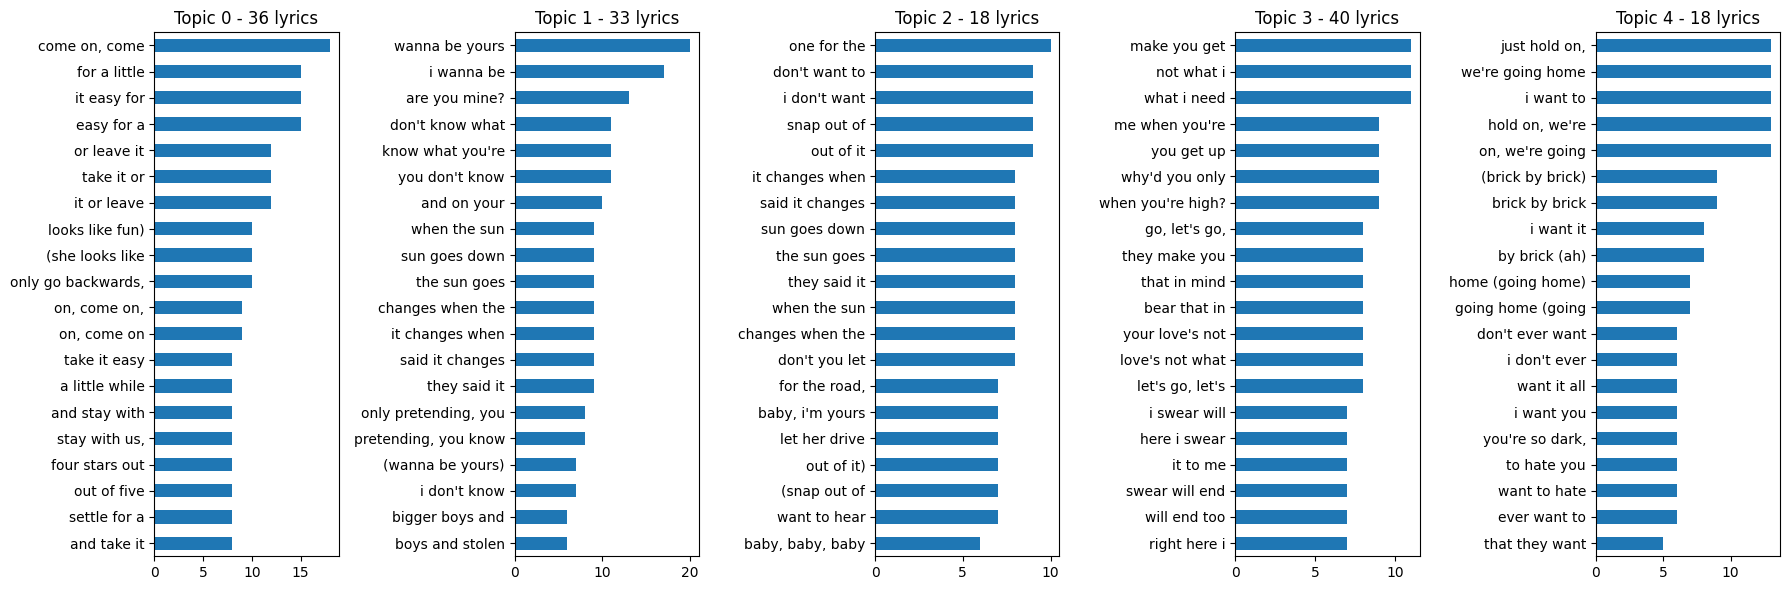

In [29]:
topics = set(s)
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(topics))
for i, v in enumerate(topics):
    dfsm = df.loc[s.eq(v), 'lyrics']
    ngram = pd.Series(get_ngrams_from_series(dfsm, 3)).value_counts()[:20][::-1]
    ngram.plot(kind='barh', ax=axs[i], title='Topic {} - {} lyrics'.format(v, s.eq(v).sum()))
plt.tight_layout()
df['topic'] = s.astype(str).radd('Topic ')

In [30]:
df

,song,lyrics,#characters,#words,#lines,#uniq_words,lexical_density,sentiment_score,sentiment,topic
0,Batphone,\nI want an interesting synonym to describe th...,1384,252,38,152,0.603175,0.6059,positive,Topic 3
1,Fire And The Thud,\nYou showed me my tomorrow\nBeside a box of m...,1051,197,40,140,0.710660,0.8455,positive,Topic 3
2,Catapult,"\nBoth sides, and softly came the growl from b...",1460,289,43,168,0.581315,0.9831,positive,Topic 3
3,I Haven't Got My Strange,\nWhen I got back from fixing my hair\nYou wer...,666,129,27,79,0.612403,0.8546,positive,Topic 1
4,Jet Skis On The Moat,\nJet skis on the moat\nThey shot it all in Ci...,846,161,36,91,0.565217,0.9498,positive,Topic 1
...,...,...,...,...,...,...,...,...,...,...
140,From The Ritz To The Rubble,"\nLast night, these two bouncers and one of em...",1821,354,54,188,0.531073,0.7338,positive,Topic 1
141,Still Take You Home,\nWell It's ever so funny\nI don't think you'r...,1396,265,56,125,0.471698,-0.9473,negative,Topic 1
142,Bigger Boys And Stolen Sweethearts (B-Side Sin...,\nThere's always somebody taller\nWith more of...,1674,321,62,156,0.485981,0.9966,positive,Topic 1
143,You Probably Couldn't See For The Lights But Y...,\nOne look sends it coursing through the veins...,1151,223,27,141,0.632287,0.9874,positive,Topic 0


### **Sentiment across topics**

<Axes: xlabel='topic', ylabel='sentiment_score'>

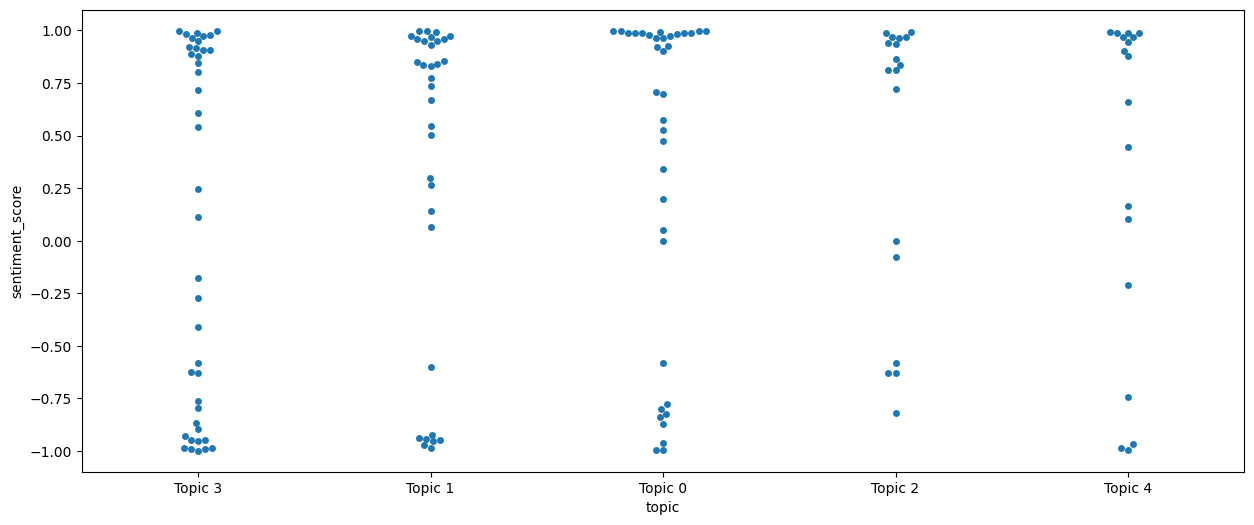

In [31]:
fig, axs = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='topic', y='sentiment_score', data=df)

### **Lexical density across topics**

<Axes: xlabel='topic', ylabel='lexical_density'>

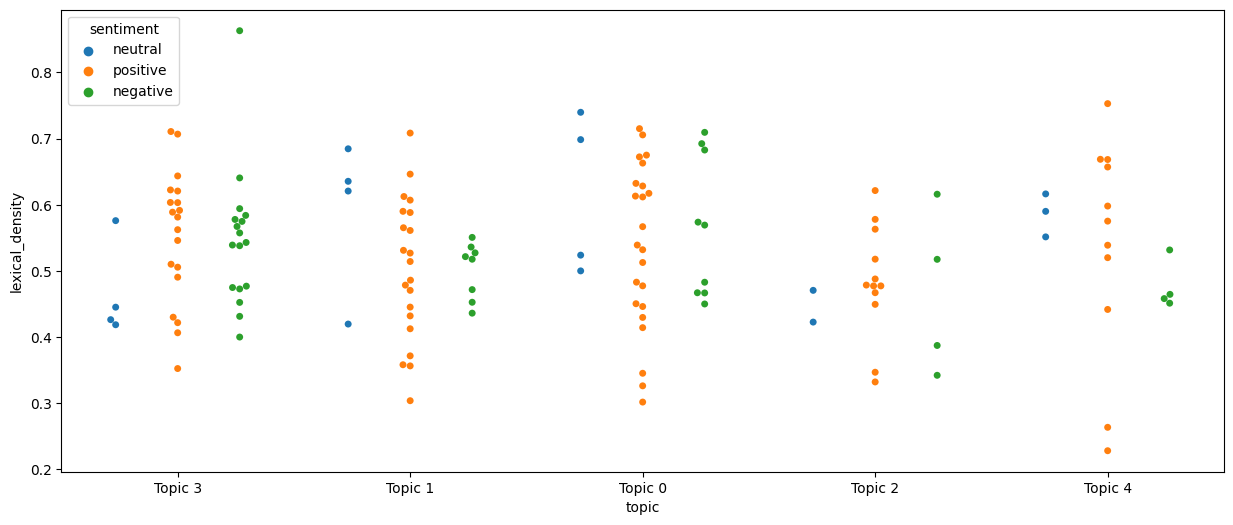

In [32]:
fig, axs = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='topic', y='lexical_density', hue='sentiment',
              hue_order=['neutral', 'positive', 'negative'], data=df, dodge=True)